In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import csv
from datetime import datetime

In [17]:


#results_folders = [os.path.join("../results_AF", folder) for folder in os.listdir("../results_AF") if os.path.isdir(os.path.join("../results_AF", folder))]
results_folders = ["../results_AF/folds_2025_05_05_09_19",
                   "../results_AF/folds_2025_05_05_10_57",
                   "../results_AF/folds_2025_05_05_13_05"]
ignore_file = "ignore_list_AF_out.txt"

# Load ignore list
ignore_jobs = set()
if os.path.exists(ignore_file):
    with open(ignore_file, "r") as f:
        for line in f:
            name = line.strip()
            if name:
                ignore_jobs.add(name)

results = []
extracted_jobs = []


# Iterate over each folder in results_folders
all_jobs_data = []
for results_folder in results_folders:
    if not os.path.isdir(results_folder):
        print(f"Warning: {results_folder} does not exist or is not a directory, skipping.")
        continue

    for job_folder in os.listdir(results_folder):
        job_path = os.path.join(results_folder, job_folder)
        if not os.path.isdir(job_path):
            continue

        for file_name in os.listdir(job_path):
            if file_name.endswith(".json") and "summary_confidences" in file_name:
                with open(os.path.join(job_path, file_name)) as json_file:
                    data = json.load(json_file)
                    result_number = int(file_name.split("_")[-1].split(".")[0])
                    data["Job Folder"] = job_folder
                    data["Result Number"] = result_number
                    all_jobs_data.append(data)

# Create a DataFrame from the collected data
df = pd.DataFrame(all_jobs_data)

# Set the index to be the job name and result number
df.set_index(["Job Folder", "Result Number"], inplace=True)

In [18]:


# Calculate statistics
mean_iptm = df["iptm"].mean()
std_iptm = df["iptm"].std()
mean_ptm = df["ptm"].mean()
std_ptm = df["ptm"].std()


In [19]:


# Print the statistics
print(f"Number of analyzed jobs: {len(df)}")
print(f"iPTM - Mean: {mean_iptm:.2f}, Standard Deviation: {std_iptm:.2f}")
print(f"PTM - Mean: {mean_ptm:.2f}, Standard Deviation: {std_ptm:.2f}")

# Calculate and print the minimum and maximum values for iPTM and PTM
min_iptm = df["iptm"].min()
max_iptm = df["iptm"].max()
min_ptm = df["ptm"].min()
max_ptm = df["ptm"].max()

print(f"iPTM - Min: {min_iptm:.2f}, Max: {max_iptm:.2f}")
print(f"PTM - Min: {min_ptm:.2f}, Max: {max_ptm:.2f}")


Number of analyzed jobs: 450
iPTM - Mean: 0.23, Standard Deviation: 0.13
PTM - Mean: 0.48, Standard Deviation: 0.07
iPTM - Min: 0.08, Max: 0.65
PTM - Min: 0.30, Max: 0.67


In [15]:
highest_iptm_row = df.loc[df['iptm'].idxmax()]
print(highest_iptm_row)

chain_iptm                               [0.6, 0.6]
chain_pair_iptm          [[0.56, 0.6], [0.6, 0.69]]
chain_pair_pae_min     [[0.76, 4.05], [3.51, 0.76]]
chain_ptm                              [0.56, 0.69]
fraction_disordered                            0.09
has_clash                                       0.0
iptm                                            0.6
num_recycles                                   10.0
ptm                                            0.66
ranking_score                                  0.65
Name: (e9pky0_q92759, 1), dtype: object


In [21]:
# List iPTM scores for jobs with iPTM between 0.6 and 0.8
print("\nJobs with iPTM between 0.6 and 0.8 and their iPTM scores:")
for job in jobs_iptm_06_08:
    scores = df.loc[job, 'iptm'].tolist()
    print(f"{job}: {scores}")

# List iPTM scores for jobs with iPTM between 0.8 and 1
print("\nJobs with iPTM between 0.8 and 1 and their iPTM scores:")
for job in jobs_iptm_08_1:
    scores = df.loc[job, 'iptm'].tolist()
    print(f"{job}: {scores}")


Jobs with iPTM between 0.6 and 0.8 and their iPTM scores:
e9pky0_q92759: [0.58, 0.6, 0.57, 0.6, 0.59]
d6rhz7_q92759: [0.64, 0.65, 0.63, 0.64, 0.65]

Jobs with iPTM between 0.8 and 1 and their iPTM scores:


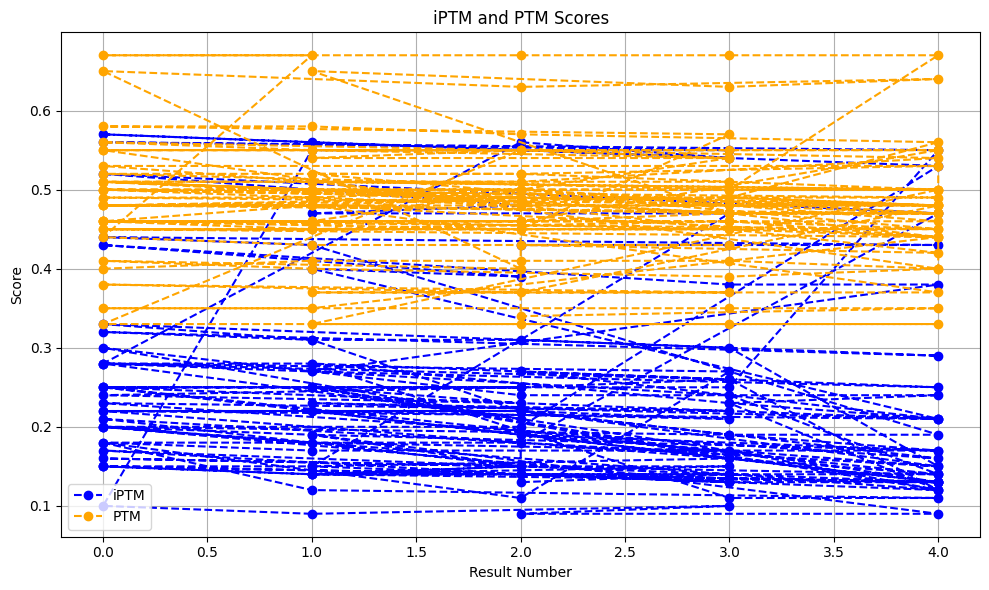

In [11]:

# Plot the iPTM and PTM scores
plt.figure(figsize=(10, 6))
plt.plot(df.index.get_level_values("Result Number"), df["iptm"], label="iPTM", marker="o", linestyle="--", color="blue")
plt.plot(df.index.get_level_values("Result Number"), df["ptm"], label="PTM", marker="o", linestyle="--", color="orange")
plt.title("iPTM and PTM Scores")
plt.xlabel("Result Number")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot in the Jupyter Notebook
plt.show()
